313/313 [==============================] - 1s 3ms/step


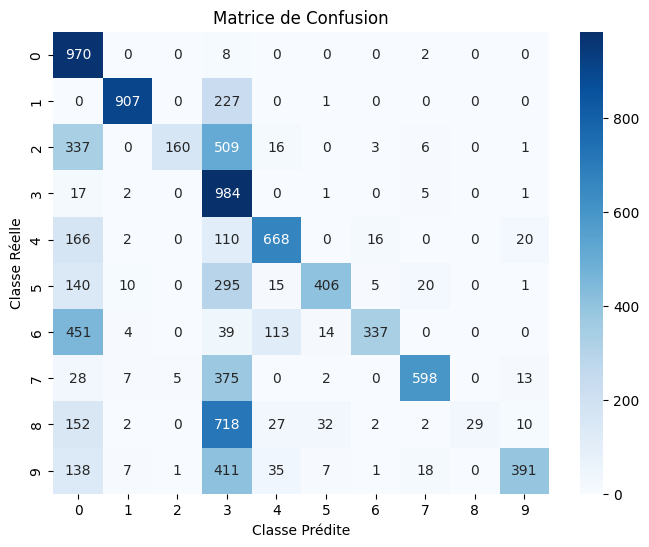


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.99      0.57       980
           1       0.96      0.80      0.87      1135
           2       0.96      0.16      0.27      1032
           3       0.27      0.97      0.42      1010
           4       0.76      0.68      0.72       982
           5       0.88      0.46      0.60       892
           6       0.93      0.35      0.51       958
           7       0.92      0.58      0.71      1028
           8       1.00      0.03      0.06       974
           9       0.89      0.39      0.54      1009

    accuracy                           0.55     10000
   macro avg       0.80      0.54      0.53     10000
weighted avg       0.80      0.55      0.53     10000



In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Charger les données MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Sélectionner 10 images pour chaque chiffre au hasard
selected_images = []
selected_labels = []

selected_indices = []
for i in range(10):  # Assuming 10 classes in MNIST
    class_indices = np.where(train_labels == i)[0]
    selected_indices.extend(np.random.choice(class_indices, 10, replace=False))
 

selected_images = np.array(train_images[selected_indices])
selected_labels = np.array(train_labels[selected_indices])

# Mélanger les données
indices = np.arange(len(selected_images))
np.random.shuffle(indices)
selected_images = selected_images[indices]
selected_labels = selected_labels[indices]

# Prétraitement des données
selected_images = selected_images.reshape((-1, 28, 28, 1)).astype('float32') / 255
selected_labels = to_categorical(selected_labels)

# Entraîner le modèle
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(selected_images, selected_labels, epochs=10, batch_size=64,verbose=0)

# Évaluation du modèle sur les données de test
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32') / 255
test_labels = to_categorical(test_labels)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Matrice de confusion
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Afficher la matrice de confusion sous forme de heatmap avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.title('Matrice de Confusion')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()

# Classification Report
class_report = classification_report(true_labels, predicted_labels)
print("\nClassification Report:")
print(class_report)
